# 기온예측

## 필요한 변수만 가져오기

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings('ignore')


# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
 
df = pd.read_csv("elec_train.csv", index_col=0)
df

,electric_train.num,electric_train.tm,electric_train.hh24,electric_train.n,electric_train.stn,electric_train.sum_qctr,electric_train.sum_load,electric_train.n_mean_load,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.weekday,electric_train.week_name,electric_train.elec
1,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
2,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
3,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
4,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
5,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,20947,2022-12-31 20:00:00,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74
7593352,20947,2022-12-31 21:00:00,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18
7593353,20947,2022-12-31 22:00:00,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33
7593354,20947,2022-12-31 23:00:00,23,23,671,34200,6355.88,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57


In [349]:
test = pd.read_csv("elec_test.csv", index_col=0)
test

,electric_test.num,electric_test.tm,electric_test.hh24,electric_test.stn,electric_test.nph_ta,electric_test.nph_hm,electric_test.nph_ws_10m,electric_test.nph_rn_60m,electric_test.nph_ta_chi,electric_test.weekday,electric_test.week_name
1,2385,2023-01-01 01:00:00,1,303,7.8,61.5,6.7,0.0,4.2,6,1
2,2385,2023-01-01 02:00:00,2,303,7.9,60.6,7.6,0.0,4.0,6,1
3,2385,2023-01-01 03:00:00,3,303,8.2,61.9,8.7,0.0,4.1,6,1
4,2385,2023-01-01 04:00:00,4,303,8.4,60.9,9.2,0.0,4.3,6,1
5,2385,2023-01-01 05:00:00,5,303,8.5,60.9,9.5,0.0,4.3,6,1
...,...,...,...,...,...,...,...,...,...,...,...
2838235,12322,2023-12-31 20:00:00,20,901,5.6,70.8,3.2,0.0,5.8,6,1
2838236,12322,2023-12-31 21:00:00,21,901,5.3,69.1,3.6,0.0,4.5,6,1
2838237,12322,2023-12-31 22:00:00,22,901,5.1,70.6,3.0,0.0,5.1,6,1
2838238,12322,2023-12-31 23:00:00,23,901,5.2,69.7,3.8,0.0,5.1,6,1


In [350]:
df.columns = df.columns.str.replace('electric_train.', '', regex=False) 
df

,num,tm,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec
1,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
2,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
3,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
4,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
5,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,20947,2022-12-31 20:00:00,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74
7593352,20947,2022-12-31 21:00:00,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18
7593353,20947,2022-12-31 22:00:00,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33
7593354,20947,2022-12-31 23:00:00,23,23,671,34200,6355.88,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57


In [351]:
print(df.columns)
print(test.columns)

Index(['num', 'tm', 'hh24', 'n', 'stn', 'sum_qctr', 'sum_load', 'n_mean_load',
       'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi', 'weekday',
       'week_name', 'elec'],
      dtype='object')
Index(['electric_test.num', 'electric_test.tm', 'electric_test.hh24',
       'electric_test.stn', 'electric_test.nph_ta', 'electric_test.nph_hm',
       'electric_test.nph_ws_10m', 'electric_test.nph_rn_60m',
       'electric_test.nph_ta_chi', 'electric_test.weekday',
       'electric_test.week_name'],
      dtype='object')


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7593355 entries, 1 to 7593355
Data columns (total 16 columns):
 #   Column       Dtype  
---  ------       -----  
 0   num          int64  
 1   tm           object 
 2   hh24         int64  
 3   n            int64  
 4   stn          int64  
 5   sum_qctr     int64  
 6   sum_load     float64
 7   n_mean_load  float64
 8   nph_ta       float64
 9   nph_hm       float64
 10  nph_ws_10m   float64
 11  nph_rn_60m   float64
 12  nph_ta_chi   float64
 13  weekday      int64  
 14  week_name    int64  
 15  elec         float64
dtypes: float64(8), int64(7), object(1)
memory usage: 984.9+ MB


In [353]:
tr = df
tr['tm'] = pd.to_datetime(tr['tm'])

# '년', '월', '일', '시' 변수 생성
tr['year'] = tr['tm'].dt.year
tr['mon'] = tr['tm'].dt.month
tr['day'] = tr['tm'].dt.day
tr

,num,tm,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec,year,mon,day
1,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56,2021,1,1
2,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78,2021,1,1
3,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17,2021,1,1
4,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34,2021,1,1
5,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,20947,2022-12-31 20:00:00,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74,2022,12,31
7593352,20947,2022-12-31 21:00:00,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18,2022,12,31
7593353,20947,2022-12-31 22:00:00,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33,2022,12,31
7593354,20947,2022-12-31 23:00:00,23,23,671,34200,6355.88,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57,2022,12,31


In [354]:
tr['mean_qctr'] = tr['sum_qctr'] / tr['n']
tr

,num,tm,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec,year,mon,day,mean_qctr
1,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56,2021,1,1,631.818182
2,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78,2021,1,1,631.818182
3,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17,2021,1,1,631.818182
4,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34,2021,1,1,631.818182
5,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73,2021,1,1,631.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,20947,2022-12-31 20:00:00,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74,2022,12,31,1486.956522
7593352,20947,2022-12-31 21:00:00,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18,2022,12,31,1486.956522
7593353,20947,2022-12-31 22:00:00,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33,2022,12,31,1486.956522
7593354,20947,2022-12-31 23:00:00,23,23,671,34200,6355.88,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57,2022,12,31,1486.956522


In [355]:
tr.columns

Index(['num', 'tm', 'hh24', 'n', 'stn', 'sum_qctr', 'sum_load', 'n_mean_load',
       'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi', 'weekday',
       'week_name', 'elec', 'year', 'mon', 'day', 'mean_qctr'],
      dtype='object')

In [356]:
tr = tr[['num', 'tm', 'year', 'mon', 'day','hh24', 'mean_qctr', 'n_mean_load',
       'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi', 'weekday',
       'week_name', 'elec']]

tr

,num,tm,year,mon,day,hh24,mean_qctr,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec
1,4821,2021-01-01 01:00:00,2021,1,1,1,631.818182,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
2,4821,2021-01-01 02:00:00,2021,1,1,2,631.818182,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
3,4821,2021-01-01 03:00:00,2021,1,1,3,631.818182,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
4,4821,2021-01-01 04:00:00,2021,1,1,4,631.818182,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
5,4821,2021-01-01 05:00:00,2021,1,1,5,631.818182,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,20947,2022-12-31 20:00:00,2022,12,31,20,1486.956522,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74
7593352,20947,2022-12-31 21:00:00,2022,12,31,21,1486.956522,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18
7593353,20947,2022-12-31 22:00:00,2022,12,31,22,1486.956522,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33
7593354,20947,2022-12-31 23:00:00,2022,12,31,23,1486.956522,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57


## 결측값, 이상치 제거 / 격자별 비교

In [357]:
#음수값 확인
out_tr=tr[tr['nph_ws_10m']<0]
wsout=tr['nph_ws_10m'] == -99
wsout_index=tr[wsout].index
wsout_index
out_tr

,num,tm,year,mon,day,hh24,mean_qctr,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec
91272,8994,2022-05-31 00:00:00,2022,5,31,24,608.333333,72.555118,18.5,84.1,-99.0,0.0,20.7,1,0,95.30
257880,10069,2022-05-31 00:00:00,2022,5,31,24,658.333333,99.993815,16.1,71.1,-99.0,0.0,22.2,1,0,88.79
259481,10069,2022-08-05 17:00:00,2022,8,5,17,658.333333,99.993815,28.4,78.8,-99.0,0.0,32.0,4,0,147.08
319272,10222,2022-05-31 00:00:00,2022,5,31,24,1505.000000,203.794753,16.6,75.6,-99.0,0.0,22.1,1,0,96.90
320873,10222,2022-08-05 17:00:00,2022,8,5,17,1505.000000,203.794753,28.3,81.4,-99.0,0.0,31.5,4,0,155.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5992364,18538,2022-05-31 00:00:00,2022,5,31,24,1984.745763,269.447610,17.6,77.4,-99.0,0.0,18.4,1,0,100.96
7447891,19611,2022-05-31 00:00:00,2022,5,31,24,1428.947368,215.649186,16.3,87.7,-99.0,0.0,18.7,1,0,98.61
7474195,19612,2022-05-31 00:00:00,2022,5,31,24,2506.210526,225.043306,16.8,90.1,-99.0,0.0,19.3,1,0,95.84
7509283,19741,2022-05-31 00:00:00,2022,5,31,24,1183.333333,314.118874,15.6,89.3,-99.0,0.0,18.0,1,0,96.66


In [358]:
# -99 전후 데이터의 평균으로 대체하는 함수
def rplc_out(df, df_out, col):
    df_out_idx = df[df_out].index
    for idx in df_out_idx:
        if idx == 0 or idx == len(df) - 1:
            continue  # 첫 행이나 마지막 행 스킵(평균치 낼 수 없음)
    
        prev_val = df.at[idx - 1, col]
        next_val = df.at[idx + 1, col]
        
        # 둘 중 하나가 -99인 경우 건너뜀
        if prev_val == -99 or next_val == -99:
            continue
        
        # 평균값으로 대체
        mean_val = np.mean([prev_val, next_val])
        df.loc[idx, col] = mean_val

In [359]:
# 호출
rplc_out(tr, wsout, 'nph_ws_10m')

# 변경된 데이터프레임 확인
tr

,num,tm,year,mon,day,hh24,mean_qctr,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec
1,4821,2021-01-01 01:00:00,2021,1,1,1,631.818182,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
2,4821,2021-01-01 02:00:00,2021,1,1,2,631.818182,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
3,4821,2021-01-01 03:00:00,2021,1,1,3,631.818182,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
4,4821,2021-01-01 04:00:00,2021,1,1,4,631.818182,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
5,4821,2021-01-01 05:00:00,2021,1,1,5,631.818182,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,20947,2022-12-31 20:00:00,2022,12,31,20,1486.956522,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74
7593352,20947,2022-12-31 21:00:00,2022,12,31,21,1486.956522,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18
7593353,20947,2022-12-31 22:00:00,2022,12,31,22,1486.956522,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33
7593354,20947,2022-12-31 23:00:00,2022,12,31,23,1486.956522,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57


In [360]:
negative_elec = tr[tr['elec'] < 0]
# -99 값을 이전 행과 이후 행의 평균값으로 대체하는 함수
def replace_with_mean(series):
    for i in range(1, len(series) - 1):
        if series[i] == -99:
            series[i] = (series[i-1] + series[i+1]) / 2
    return series
# 첫번째 행이나 마지막행 없음, 연속된 -99값 존재x

# 'elec' 열에 대해 함수 적용
tr['elec'] = replace_with_mean(tr['elec'])

In [361]:
tr

,num,tm,year,mon,day,hh24,mean_qctr,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec
1,4821,2021-01-01 01:00:00,2021,1,1,1,631.818182,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
2,4821,2021-01-01 02:00:00,2021,1,1,2,631.818182,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
3,4821,2021-01-01 03:00:00,2021,1,1,3,631.818182,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
4,4821,2021-01-01 04:00:00,2021,1,1,4,631.818182,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
5,4821,2021-01-01 05:00:00,2021,1,1,5,631.818182,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,20947,2022-12-31 20:00:00,2022,12,31,20,1486.956522,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74
7593352,20947,2022-12-31 21:00:00,2022,12,31,21,1486.956522,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18
7593353,20947,2022-12-31 22:00:00,2022,12,31,22,1486.956522,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33
7593354,20947,2022-12-31 23:00:00,2022,12,31,23,1486.956522,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57


In [362]:
tr['num'].value_counts()

num
15735    26304
17644    26304
18085    26304
17948    26304
17943    26304
         ...  
13360     8760
10224     8760
16913     8760
13648     8760
4821      8760
Name: count, Length: 323, dtype: int64

In [363]:
tr_15735 = tr[tr['num'] == 15735]
tr_17644 = tr[tr['num'] == 17644]

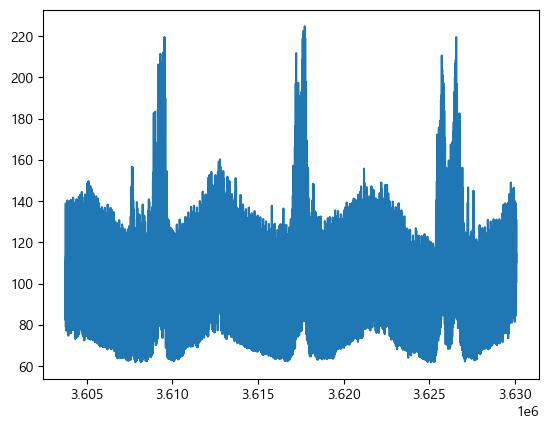

In [364]:
plt.plot(tr_15735.index, tr_15735['elec'])

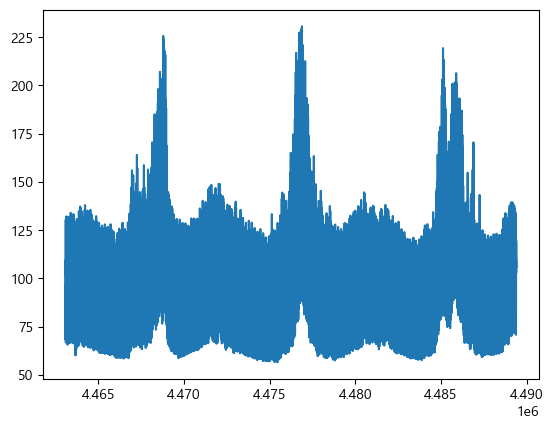

In [365]:
plt.plot(tr_17644.index, tr_17644['elec'])

## 격자 평균 elec 구하기

- 모델 평가지표가 전격자 평균
- 평균으로 모델 구한 후 각 격자에 적용해볼까?

In [366]:
tr

,num,tm,year,mon,day,hh24,mean_qctr,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec
1,4821,2021-01-01 01:00:00,2021,1,1,1,631.818182,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
2,4821,2021-01-01 02:00:00,2021,1,1,2,631.818182,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
3,4821,2021-01-01 03:00:00,2021,1,1,3,631.818182,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
4,4821,2021-01-01 04:00:00,2021,1,1,4,631.818182,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
5,4821,2021-01-01 05:00:00,2021,1,1,5,631.818182,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,20947,2022-12-31 20:00:00,2022,12,31,20,1486.956522,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74
7593352,20947,2022-12-31 21:00:00,2022,12,31,21,1486.956522,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18
7593353,20947,2022-12-31 22:00:00,2022,12,31,22,1486.956522,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33
7593354,20947,2022-12-31 23:00:00,2022,12,31,23,1486.956522,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57


In [367]:
tr['tm'].value_counts()

tm
2020-07-02 01:00:00    300
2020-05-01 22:00:00    300
2020-05-02 04:00:00    300
2020-05-02 03:00:00    300
2020-05-02 02:00:00    300
                      ... 
2022-05-02 10:00:00    267
2022-05-02 09:00:00    267
2023-01-01 00:00:00    267
2022-04-21 22:00:00    266
2022-11-26 04:00:00    266
Name: count, Length: 26304, dtype: int64

In [368]:
tr.columns # 상관계수 파악을 통해 상관계수 높은 온도랑 qctr 제거

Index(['num', 'tm', 'year', 'mon', 'day', 'hh24', 'mean_qctr', 'n_mean_load',
       'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi', 'weekday',
       'week_name', 'elec'],
      dtype='object')

In [369]:
tr = tr[['tm', 'year', 'mon', 'day', 'hh24', 'n_mean_load', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi', 'weekday',
       'week_name', 'elec']]
tr

,tm,year,mon,day,hh24,n_mean_load,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec
1,2021-01-01 01:00:00,2021,1,1,1,68.606449,62.7,1.8,0.0,-1.0,4,0,99.56
2,2021-01-01 02:00:00,2021,1,1,2,68.606449,63.1,2.1,0.0,-0.6,4,0,91.78
3,2021-01-01 03:00:00,2021,1,1,3,68.606449,62.4,2.5,0.0,-1.3,4,0,79.17
4,2021-01-01 04:00:00,2021,1,1,4,68.606449,63.5,1.7,0.0,-0.2,4,0,73.34
5,2021-01-01 05:00:00,2021,1,1,5,68.606449,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,2022-12-31 20:00:00,2022,12,31,20,225.461986,46.3,3.1,0.0,-0.4,5,1,130.74
7593352,2022-12-31 21:00:00,2022,12,31,21,225.461986,46.8,3.1,0.0,-0.5,5,1,131.18
7593353,2022-12-31 22:00:00,2022,12,31,22,225.461986,47.4,2.1,0.0,0.2,5,1,129.33
7593354,2022-12-31 23:00:00,2022,12,31,23,225.461986,47.0,2.1,0.0,0.3,5,1,122.57


In [370]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7593355 entries, 1 to 7593355
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   tm           datetime64[ns]
 1   year         int32         
 2   mon          int32         
 3   day          int32         
 4   hh24         int64         
 5   n_mean_load  float64       
 6   nph_hm       float64       
 7   nph_ws_10m   float64       
 8   nph_rn_60m   float64       
 9   nph_ta_chi   float64       
 10  weekday      int64         
 11  week_name    int64         
 12  elec         float64       
dtypes: datetime64[ns](1), float64(6), int32(3), int64(3)
memory usage: 982.2 MB


## EDA

In [371]:
tr.columns = ['time', '연', '월', '일', '시', '평균부하량', '상대습도', '풍속', '강수량', '체감온도', '요일', '주중/말', 'y']
tr

,time,연,월,일,시,평균부하량,상대습도,풍속,강수량,체감온도,요일,주중/말,y
1,2021-01-01 01:00:00,2021,1,1,1,68.606449,62.7,1.8,0.0,-1.0,4,0,99.56
2,2021-01-01 02:00:00,2021,1,1,2,68.606449,63.1,2.1,0.0,-0.6,4,0,91.78
3,2021-01-01 03:00:00,2021,1,1,3,68.606449,62.4,2.5,0.0,-1.3,4,0,79.17
4,2021-01-01 04:00:00,2021,1,1,4,68.606449,63.5,1.7,0.0,-0.2,4,0,73.34
5,2021-01-01 05:00:00,2021,1,1,5,68.606449,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593351,2022-12-31 20:00:00,2022,12,31,20,225.461986,46.3,3.1,0.0,-0.4,5,1,130.74
7593352,2022-12-31 21:00:00,2022,12,31,21,225.461986,46.8,3.1,0.0,-0.5,5,1,131.18
7593353,2022-12-31 22:00:00,2022,12,31,22,225.461986,47.4,2.1,0.0,0.2,5,1,129.33
7593354,2022-12-31 23:00:00,2022,12,31,23,225.461986,47.0,2.1,0.0,0.3,5,1,122.57


In [372]:
data = tr.groupby('time').mean()
data

,연,월,일,시,평균부하량,상대습도,풍속,강수량,체감온도,요일,주중/말,y
time,,,,,,,,,,,,
2020-01-01 01:00:00,2020.0,1.0,1.0,1.0,237.858015,44.351667,2.198333,0.001333,-7.056000,2.0,0.0,101.528000
2020-01-01 02:00:00,2020.0,1.0,1.0,2.0,237.858015,44.210667,2.357000,0.000000,-6.949667,2.0,0.0,92.998033
2020-01-01 03:00:00,2020.0,1.0,1.0,3.0,237.858015,48.535333,2.136333,0.001000,-6.851667,2.0,0.0,83.948100
2020-01-01 04:00:00,2020.0,1.0,1.0,4.0,237.858015,53.730000,1.945667,0.000000,-6.541667,2.0,0.0,77.917967
2020-01-01 05:00:00,2020.0,1.0,1.0,5.0,237.858015,58.235667,1.942667,0.000000,-5.849333,2.0,0.0,75.457667
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:00:00,2022.0,12.0,31.0,20.0,251.117294,59.514607,1.641573,0.000000,-1.355056,5.0,1.0,125.857940
2022-12-31 21:00:00,2022.0,12.0,31.0,21.0,251.117294,61.966292,1.383521,0.000000,-1.945318,5.0,1.0,124.967978
2022-12-31 22:00:00,2022.0,12.0,31.0,22.0,251.117294,63.524719,1.607491,0.000000,-2.240075,5.0,1.0,123.070449


In [373]:
data.columns

Index(['연', '월', '일', '시', '평균부하량', '상대습도', '풍속', '강수량', '체감온도', '요일', '주중/말',
       'y'],
      dtype='object')

In [374]:
used_col = data[['평균부하량', '상대습도', '풍속', '강수량', '체감온도', 'y']]
used_col

,평균부하량,상대습도,풍속,강수량,체감온도,y
time,,,,,,
2020-01-01 01:00:00,237.858015,44.351667,2.198333,0.001333,-7.056000,101.528000
2020-01-01 02:00:00,237.858015,44.210667,2.357000,0.000000,-6.949667,92.998033
2020-01-01 03:00:00,237.858015,48.535333,2.136333,0.001000,-6.851667,83.948100
2020-01-01 04:00:00,237.858015,53.730000,1.945667,0.000000,-6.541667,77.917967
2020-01-01 05:00:00,237.858015,58.235667,1.942667,0.000000,-5.849333,75.457667
...,...,...,...,...,...,...
2022-12-31 20:00:00,251.117294,59.514607,1.641573,0.000000,-1.355056,125.857940
2022-12-31 21:00:00,251.117294,61.966292,1.383521,0.000000,-1.945318,124.967978
2022-12-31 22:00:00,251.117294,63.524719,1.607491,0.000000,-2.240075,123.070449


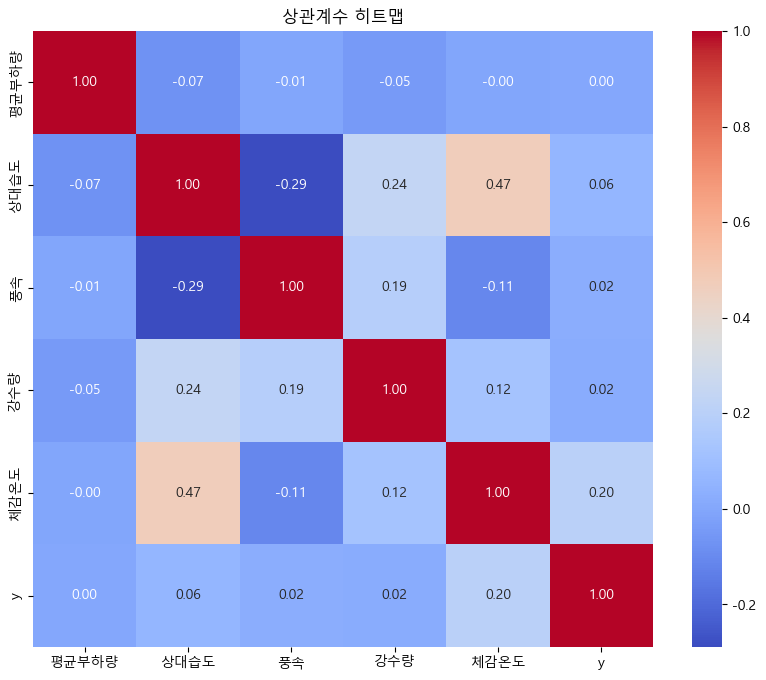

In [375]:
correlation_matrix = used_col.corr()

# 시각화를 위한 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관계수 히트맵')
plt.show()

<Axes: xlabel='체감온도', ylabel='y'>

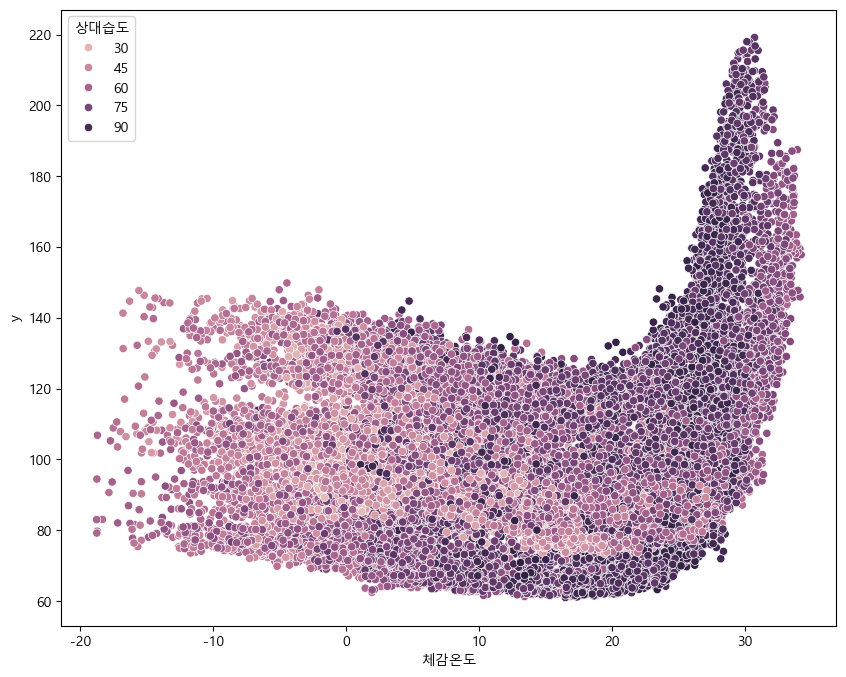

In [376]:
# hue에 따라 종류별 색깔 다르게 해서 산점도 표현
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x ='체감온도',y='y',hue='상대습도')

In [377]:
data.columns

Index(['연', '월', '일', '시', '평균부하량', '상대습도', '풍속', '강수량', '체감온도', '요일', '주중/말',
       'y'],
      dtype='object')

In [378]:
data = data[['연', '월', '일', '시', '상대습도', '풍속', '강수량', '체감온도', '요일', '주중/말',
       'y']]
data

,연,월,일,시,상대습도,풍속,강수량,체감온도,요일,주중/말,y
time,,,,,,,,,,,
2020-01-01 01:00:00,2020.0,1.0,1.0,1.0,44.351667,2.198333,0.001333,-7.056000,2.0,0.0,101.528000
2020-01-01 02:00:00,2020.0,1.0,1.0,2.0,44.210667,2.357000,0.000000,-6.949667,2.0,0.0,92.998033
2020-01-01 03:00:00,2020.0,1.0,1.0,3.0,48.535333,2.136333,0.001000,-6.851667,2.0,0.0,83.948100
2020-01-01 04:00:00,2020.0,1.0,1.0,4.0,53.730000,1.945667,0.000000,-6.541667,2.0,0.0,77.917967
2020-01-01 05:00:00,2020.0,1.0,1.0,5.0,58.235667,1.942667,0.000000,-5.849333,2.0,0.0,75.457667
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:00:00,2022.0,12.0,31.0,20.0,59.514607,1.641573,0.000000,-1.355056,5.0,1.0,125.857940
2022-12-31 21:00:00,2022.0,12.0,31.0,21.0,61.966292,1.383521,0.000000,-1.945318,5.0,1.0,124.967978
2022-12-31 22:00:00,2022.0,12.0,31.0,22.0,63.524719,1.607491,0.000000,-2.240075,5.0,1.0,123.070449


In [384]:
data.reset_index(drop=True, inplace=True)

In [379]:
data['요일'] = data['요일'].astype(str)
data['주중/말'] = data['주중/말'].astype(str)
data['연'] = data['연'].astype(str)

In [385]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
encoder = OneHotEncoder()

# 범주형 변수를 원핫인코딩하여 변환
one_hot_encoded = encoder.fit_transform(data[['요일', '주중/말', '연']])

# 변환된 결과를 데이터프레임으로 변환
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['요일', '주중/말', '연']))

# 원핫인코딩된 결과 출력
print(one_hot_encoded_df)

       요일_0.0  요일_1.0  요일_2.0  요일_3.0  요일_4.0  요일_5.0  요일_6.0  주중/말_0.0  \
0         0.0     0.0     1.0     0.0     0.0     0.0     0.0       1.0   
1         0.0     0.0     1.0     0.0     0.0     0.0     0.0       1.0   
2         0.0     0.0     1.0     0.0     0.0     0.0     0.0       1.0   
3         0.0     0.0     1.0     0.0     0.0     0.0     0.0       1.0   
4         0.0     0.0     1.0     0.0     0.0     0.0     0.0       1.0   
...       ...     ...     ...     ...     ...     ...     ...       ...   
26299     0.0     0.0     0.0     0.0     0.0     1.0     0.0       0.0   
26300     0.0     0.0     0.0     0.0     0.0     1.0     0.0       0.0   
26301     0.0     0.0     0.0     0.0     0.0     1.0     0.0       0.0   
26302     0.0     0.0     0.0     0.0     0.0     1.0     0.0       0.0   
26303     0.0     0.0     0.0     0.0     0.0     0.0     1.0       0.0   

       주중/말_1.0  연_2020.0  연_2021.0  연_2022.0  연_2023.0  
0           0.0       1.0       0.0      

In [386]:
data_encoded = pd.concat([data, one_hot_encoded_df], axis=1)
data_encoded

,연,월,일,시,상대습도,풍속,강수량,체감온도,요일,주중/말,...,요일_3.0,요일_4.0,요일_5.0,요일_6.0,주중/말_0.0,주중/말_1.0,연_2020.0,연_2021.0,연_2022.0,연_2023.0
0,2020.0,1.0,1.0,1.0,44.351667,2.198333,0.001333,-7.056000,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2020.0,1.0,1.0,2.0,44.210667,2.357000,0.000000,-6.949667,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2020.0,1.0,1.0,3.0,48.535333,2.136333,0.001000,-6.851667,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,2020.0,1.0,1.0,4.0,53.730000,1.945667,0.000000,-6.541667,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2020.0,1.0,1.0,5.0,58.235667,1.942667,0.000000,-5.849333,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2022.0,12.0,31.0,20.0,59.514607,1.641573,0.000000,-1.355056,5.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26300,2022.0,12.0,31.0,21.0,61.966292,1.383521,0.000000,-1.945318,5.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26301,2022.0,12.0,31.0,22.0,63.524719,1.607491,0.000000,-2.240075,5.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26302,2022.0,12.0,31.0,23.0,64.291386,1.757303,0.000000,-2.294757,5.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [392]:
data_encoded.columns

Index(['연', '월', '일', '시', '상대습도', '풍속', '강수량', '체감온도', '요일', '주중/말', 'y',
       '요일_0.0', '요일_1.0', '요일_2.0', '요일_3.0', '요일_4.0', '요일_5.0', '요일_6.0',
       '주중/말_0.0', '주중/말_1.0', '연_2020.0', '연_2021.0', '연_2022.0', '연_2023.0'],
      dtype='object')

In [393]:
data_encoded = data_encoded[['월', '일', '시', '상대습도', '풍속', '강수량', '체감온도','y',
       '요일_0.0', '요일_1.0', '요일_2.0', '요일_3.0', '요일_4.0', '요일_5.0', '요일_6.0',
       '주중/말_0.0', '주중/말_1.0', '연_2020.0', '연_2021.0', '연_2022.0', '연_2023.0']]

data_encoded

,월,일,시,상대습도,풍속,강수량,체감온도,y,요일_0.0,요일_1.0,...,요일_3.0,요일_4.0,요일_5.0,요일_6.0,주중/말_0.0,주중/말_1.0,연_2020.0,연_2021.0,연_2022.0,연_2023.0
0,1.0,1.0,1.0,44.351667,2.198333,0.001333,-7.056000,101.528000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,2.0,44.210667,2.357000,0.000000,-6.949667,92.998033,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,3.0,48.535333,2.136333,0.001000,-6.851667,83.948100,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,4.0,53.730000,1.945667,0.000000,-6.541667,77.917967,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,5.0,58.235667,1.942667,0.000000,-5.849333,75.457667,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,12.0,31.0,20.0,59.514607,1.641573,0.000000,-1.355056,125.857940,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26300,12.0,31.0,21.0,61.966292,1.383521,0.000000,-1.945318,124.967978,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26301,12.0,31.0,22.0,63.524719,1.607491,0.000000,-2.240075,123.070449,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26302,12.0,31.0,23.0,64.291386,1.757303,0.000000,-2.294757,117.743446,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [394]:
def adjusted_r_squared(y_true, y_pred, n, p):

    r_squared = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
    return adjusted_r_squared

In [409]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from catboost import CatBoostRegressor

# 데이터셋을 상반기와 하반기로 분할
data_bottom_half = data_encoded.iloc[:int(len(data_encoded) * 0.2)]  # 하반기 데이터
data_top_half = data_encoded.iloc[int(len(data_encoded) * 0.2):]  # 상반기 데이터

# 특성과 타깃 변수로 분할
X_bottom_half = data_bottom_half.drop(columns=['y'])  # 하반기 특성 변수
y_bottom_half = data_bottom_half['y']  # 하반기 타깃 변수

X_top_half = data_top_half.drop(columns=['y'])  # 상반기 특성 변수
y_top_half = data_top_half['y']  # 상반기 타깃 변수

# 훈련 데이터셋과 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = X_top_half, X_bottom_half, y_top_half, y_bottom_half

n_samples = len(y_test)
n_features = 20  # 설명 변수의 수 (예시에서는 임의로 2로 설정)

In [410]:
# XGBoost 모델 생성 및 훈련
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# 테스트 데이터셋으로 예측
y_pred = xgb_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
adj_r2 = adjusted_r_squared(y_test, y_pred, n_samples, n_features)
print("Adjusted R-squared:", adj_r2)

Mean Squared Error: 33.467048040738895
Adjusted R-squared: 0.9114258296099365


In [411]:
# LightGBM 모델 생성 및 훈련
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# 테스트 데이터셋으로 예측
y_pred = lgb_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
adj_r2 = adjusted_r_squared(y_test, y_pred, n_samples, n_features)
print("Adjusted R-squared:", adj_r2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000767 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 21044, number of used features: 19
[LightGBM] [Info] Start training from score 100.594810
Mean Squared Error: 32.23662928726353
Adjusted R-squared: 0.9146822662155429


In [412]:
# CatBoost 모델 생성 및 훈련
catboost_model = CatBoostRegressor(random_state=42, verbose=False)
catboost_model.fit(X_train, y_train)

# 테스트 데이터셋으로 예측
y_pred = catboost_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
adj_r2 = adjusted_r_squared(y_test, y_pred, n_samples, n_features)
print("Adjusted R-squared:", adj_r2)

Mean Squared Error: 31.913401708381315
Adjusted R-squared: 0.9155377230401734


In [413]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
lgb_model = lgb.LGBMRegressor(random_state=42)
catboost_model = CatBoostRegressor(random_state=42, verbose=False)

# Stacking 모델 생성
stacking_model = StackingRegressor(
    estimators=[('xgb', xgb_model), ('lgb', lgb_model), ('catboost', catboost_model)],
    final_estimator=LinearRegression()
)

# Stacking 모델 훈련
stacking_model.fit(X_train, y_train)

# 테스트 데이터셋으로 예측
y_pred = stacking_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
adj_r2 = adjusted_r_squared(y_test, y_pred, n_samples, n_features)
print("Adjusted R-squared:", adj_r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 21044, number of used features: 19
[LightGBM] [Info] Start training from score 100.594810
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1112
[LightGBM] [Info] Number of data points in the train set: 16835, number of used features: 18
[LightGBM] [Info] Start training from score 99.815013
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total